# Dynamic Programming
The sequence problem
$$
\max_{\{c_t\}}
\sum_{t=0}^\infty
\beta^t
u(x_t, c_t)
$$
s.t.
$$
x_{t+1} = F(x_t, c_t)
$$

None of these essential:
- infinite horizon
- time invariant $u$
- exponential discounting $\beta<1$ (as opposed to $\beta\delta$: $\gamma_t = \beta \delta^t$)
- deterministic law of motion

The value ("indirect utility") of this problem
$$
V_0(x_0) = \max_{\{c_t\}}
\sum_{t=0}^\infty
\beta^t
u(x_t, c_t)
$$
### The recursive problem
$$
\max_c 
u(x_t, c)
+\beta V(x_{t+1})
$$
$$
V(x_{t+1}) = 
\max_c 
u(x_{t+1}, c)
+\beta V(x_{t+2})
$$
**Bellman equation**
$$
V(x_t) = \max_c 
[u(x_t, c)
+\beta V(x_{t+1})]
$$
s.t. LOM
$$
V(x_t) = \max_c 
[u(x_t, c)
+\beta V(F(x_t,c))]
$$

1. This is a functional equation. It holds for all possible values of $x$.
2. Under some conditions, there exists unique $V()$ such that Bellman holds.
3. In this case, $V=V_0$

## Examples
### Cake eating problem
$x_t$ is wealth, $c_t$ is consumption, $R>1$ rate of return, $u= \ln(c)$
$$
\max_{\{c_t\}}
\sum_{t=0}^\infty
\beta ^t
\ln c_t
$$
s.t.
$$
x_{t+1} = R(x_t-c_t)
$$
Bellman:
$$
V(x_t) =
\max_c 
[\ln c 
+ \beta V(Rx_t - Rc)]
$$
## Solution strategies
1. Guess and verify
2. Value function iteration
3. Policy function iteration

Policy ("choice") function $c(x_t)=\arg\max [\ln c + \beta V(Rx_t - Rc)]$

Guess and verify vs "Method of undetermined coefs"
$$
LHS(x) = RHS(x)
$$
e.g. linear
$$
a_1 + b_1 x = a_2 + b_2 x
$$


### 1. Guess and verify
$$
V(x) = a+b \ln x
$$
$$
V'(x) = \frac bx
$$
FOC
$$
\ln c' + \beta V'(Rx_t-Rc)(-R)=
\frac 1c -
\beta \frac {bR}{R x_t - Rc} = 0
$$
$$
1 = \frac{\beta b c}
		{x_t - c}
$$
$$
x_t -c = \beta b c
$$
$$
c = \frac{1}{1+\beta b} x_t
$$
go back to $V()$, plug in $c()$
$$
V(x_{t+1}) = V(R\beta b/(1+\beta b)x_t)
$$
$$
= a + b\ln x_t +
b\ln(R\beta b) - b\ln(1+\beta b)
$$
substitute in future value
$$
a + b \ln x_t
= -\ln(1+\beta b)
+ \ln x_t +
$$
$$
\beta [a + b\ln x_t +
b\ln(R\beta b) - b\ln(1+\beta b)]
$$
has to hold for all $x_t$. collect terms on RHS
$$
[-\ln(1+\beta b)+\beta a+...] + [1+\beta b]\ln x_t
$$
both terms are the same on LHS and RHS
$$
b = 1+\beta b
$$
$$
b = \frac {1}{1-\beta}
$$
$$
1 + \beta b = \frac {1}{1-\beta}
$$
$$
\frac 1{1+\beta b} = (1-\beta)
$$
Collection of constant terms
$$
a = 
\ln(1-\beta) + \beta a +
\frac1{1-\beta}[\ln R + \ln\beta - \ln(1-\beta)  + \ln(1-\beta)]
$$
$$
a = 
\ln(1-\beta) + \beta a +
\frac1{1-\beta}\ln (R\beta)
$$
$$
a = \frac{\ln(1-\beta)} {1-\beta}
+ \frac {\ln(R\beta)}{(1-\beta)^2}
$$
Consumption function
$$
c(x) = (1-\beta)x
$$


## Illustrate functional equation

In [8]:
function plot_value_fcn(a, b)
    V = zeros(50)
    for x = 1:length(V)
        V[x] = a + b * log(x)
    end
    plot!(V)
end

plot_value_fcn (generic function with 1 method)

In [3]:
using Plots

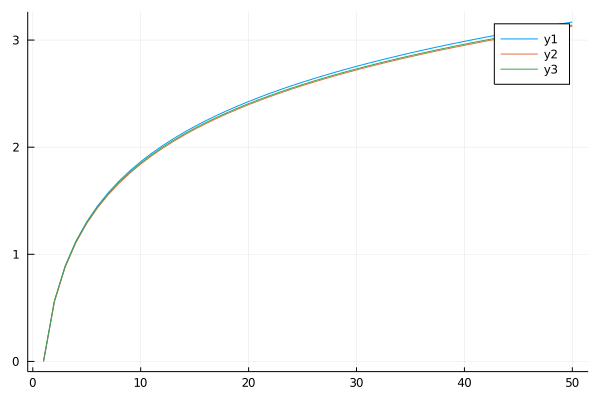

In [10]:
plot_value_fcn(0.01, 0.8)

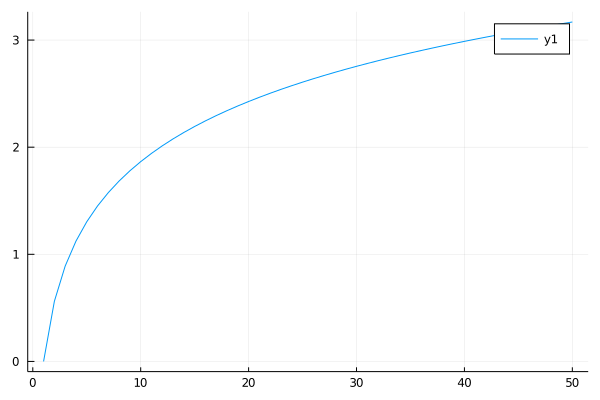

In [7]:
plot_value_fcn(0, 0.81)

#### Relax functional forms
Suppose that
$$
u(x_t, c) = c^{1-\theta}/(1-\theta) 
$$
and linear law of motion $\to$ $V(x) = a+b x^{1-\theta}$ (with $a=0$?)
Or if
$$
F(x_t, c) = kx_t^\alpha-c
$$
and $u()=\ln c$ then $V()=a+b \ln x$.
##### Aside: linear vs affine
- $ax+by$ is linear in $(x, y)$
- $a+bx$ is *affine* in $x$, not linear

### 2. Value function iteration
$$
V(x_t) = \max_c
	[ \ln c
	+ \beta V(Rx_t - Rc) ]
$$
Start with $V_0$, set
$$
V_1(x) = \max_c
[
	\ln c
	+ \beta V_0(Rx - Rc)
].
$$
Continue until convergence.

For example, start with $V_0 = 0$. But then, my optimal policy today,
$$
c_0(x) = x
$$
(implicit $c\le x$). Then your current value
$$
V_1(x) = \ln x
$$
$$
c_1(x):
\frac 1{c_1}= \frac{\beta R}{Rx-Rc_1}
$$
$c_1(x) = c_1\cdot x$, leading to $c_2\cdot x$, ...
$V_n()$ will converge to
$$
a+b\ln x
$$
with $a$ and $b$ solved for above.

### The Bellman operator
$$
TV \equiv
\max_c u(x, c) + \beta V[F(x,c)]
$$
$$
T:\mathcal C \to \mathcal C
$$
Solution of the Bellman (functional) equation
$$
V = TV
$$
is a fixed point of the Bellman operator.

*Under some conditions*, $T$ is a contraction mapping, so that
$$
\lim_{n\to \infty} T^nv = V.
$$
with
$$
T(Tv) = T^2v
$$
etc.


In [16]:
function maximize_Bellman_RHS(a::Real, b::Real)
    R = 1.04
    β = 0.8
    
    # max ln c + beta[a + b ln(Rx - Rc)]
    # c = x / (1 + beta b)
    
    new_b = 1 + β * b
    new_a = log(1 - β) + β * a + log(R*β)/(1-β)

    return new_a, new_b
end

maximize_Bellman_RHS (generic function with 1 method)

In [12]:
maximize_Bellman_RHS(0, 0)

(-3.237183898239375, 1.0)

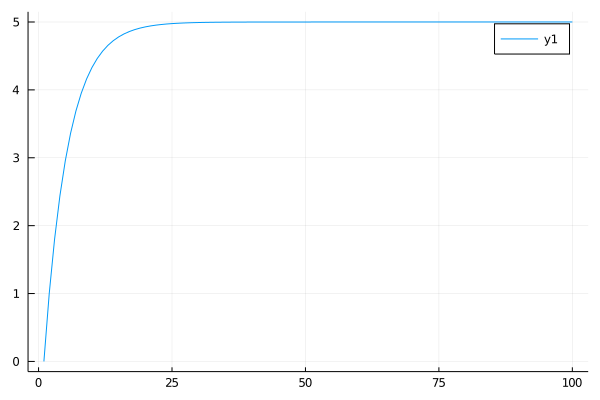

In [17]:
a = zeros(100)
b = zeros(100)
for i = 2:length(a)
    a[i], b[i] = maximize_Bellman_RHS(a[i-1], b[i-1])
end
plot(b)